In [20]:
# https://elitedatascience.com/keras-tutorial-deep-learning-in-python

import numpy
import theano

import numpy as np
from matplotlib import pyplot as plt

# Simple linear stack of neural network layer
# Perfect for the type of FF CNN
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPool2D
from keras.utils import np_utils

from keras.datasets import mnist

9


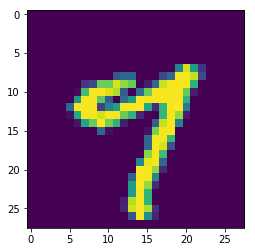

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[172])
print(y_train[172])

## Preprocess input data

In [22]:
X_train.shape

(60000, 28, 28)

When using the theano backend, you must explicity declare a dimension for the *depth* of the input image. for example, a full-color image with all 3 **RGB** channels will have a depth of 3.

Our MNIST images only have a depth of 1, but we must explicity declare that.

In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).

In [23]:
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

print(X_train.shape)

(60000, 1, 28, 28)



The final preprocessing step for the input data is to convert our data type to **float32** and normalize our data values to the range [0,1]

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Now our input data are ready for model training.

### Preprocess class labels for Keras

Next, let's take a look at the shape of our class label data:

In [25]:
y_train.shape

(60000,)

We should have 10 diffirent classes, one for each digit, but it looks like we only have a 1-dimensional array. Let's take a look at the labels for the first 10 training samples:

In [26]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

And there's the problem. The y_train and y_test data are nit split into 10 distinct class labels, but rather are represented as a single array ith the class values.

We can fix this easily:

In [27]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test =np_utils.to_categorical(y_test, 10)

In [28]:
Y_train.shape

(60000, 10)

In [29]:
Y_train[:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Define model architecture

Now we're ready to define our model architecture. In actual R&D work, researchers will spend considerable amount of time studying model architectures.

In [30]:
# Let's start by declaring a sequential model format:
model = Sequential()

In [32]:
# Just to fix problem
#https://stackoverflow.com/questions/41651628/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d

from keras import backend as K
K.set_image_dim_ordering('th')

In [33]:
# Next, we declare the input layer:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  


The input shape parameter should be the shape of 1 sample. In this case, it's the same (1,28,28) that corresponds to the (depth, width, height) of each digit image.

32, 3 ,3 correnspond to the number of convolution filters to use, the number of rows in each convolution kernel, and the number of columns in each convolution kernel, respectively.

In [34]:
model.output_shape

(None, 32, 26, 26)

In [35]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


* Dropout - method for regularizing our model in order to prevent overfitting. (https://www.quora.com/How-does-the-dropout-method-work-in-deep-learning-And-why-is-it-claimed-to-be-an-effective-trick-to-improve-your-network)
* MaxPolling2D - way to reduce the numer of parameterss in our model by sliding a 2x2 polling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

To complete our model architecture, let's add a fully connected layer and then the output layer:

In [36]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

For Dense Layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

## Compile model

We just need to compile the model and we'll be ready to train it. When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.)

In [38]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Fit model on training data.

To fit the model, all we have to do is to declare the batch size and number of epochs to train for, then pass in our training data.

In [ ]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 369s 6ms/step - loss: 0.2093 - acc: 0.9361
Epoch 2/10
60000/60000 [==============================] - 392s 7ms/step - loss: 0.0881 - acc: 0.9739
Epoch 3/10
60000/60000 [==============================] - 386s 6ms/step - loss: 0.0681 - acc: 0.9794
Epoch 4/10
26688/60000 [============>.................] - ETA: 3:29 - loss: 0.0565 - acc: 0.9835